# Data Analytics & Visualization (Task 2)

## Required Insights:
- How many unique categories are there?
- How many reactions are there to the most popular category?
- What was the month with the most posts?

In [1]:
# Imports
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
# Loading dataset 
df = pd.read_csv("Cleaned-Merged-Dataset.csv" , index_col=0)
df

,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30
...,...,...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,27/6/20 9:46,audio,technology,negative,10
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,16/2/21 17:17,audio,technology,positive,45
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,12/9/20 3:54,audio,technology,positive,30
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,4/11/20 20:08,audio,technology,negative,12


# How many unique categories are there?

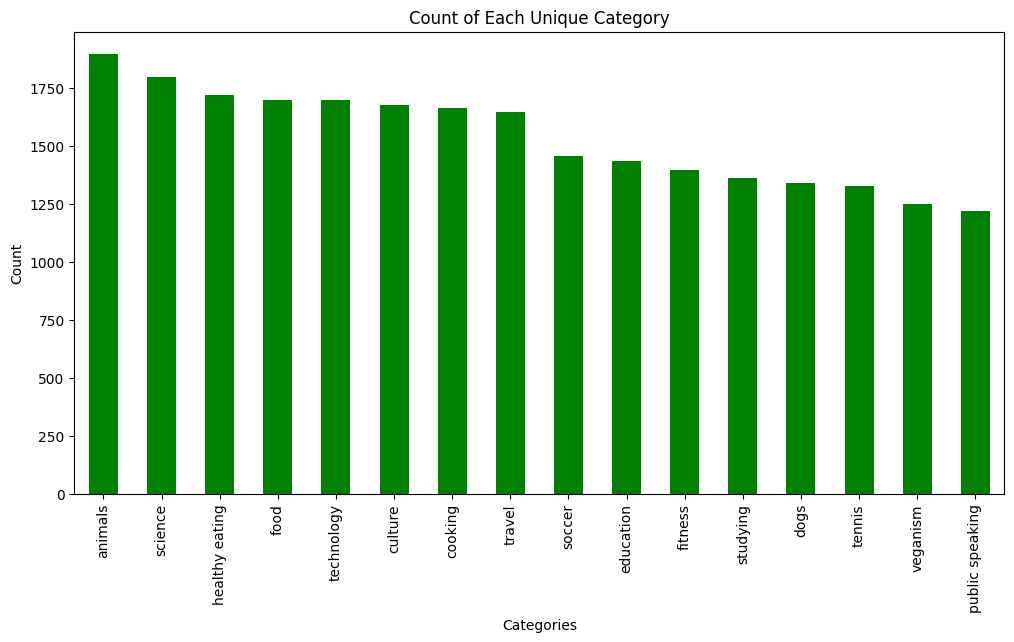

In [3]:
# Bar chart: category counts (number of reactions in each category)
category_counts = df["Category"].value_counts()

plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='green')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Count of Each Unique Category')
plt.show()

In [4]:
# Calculate the total score for each category
category_popularity = df.groupby("Category")["Score"].sum().reset_index()

# Sort the categories by total score in descending order
category_popularity = category_popularity.sort_values(by="Score", ascending=False)

# Get the top 5 categories with the largest popularity
top_5_categories = category_popularity.head(5)

# Calculate the number of reactions for each of the top 5 categories
top_5_categories["Reaction Count"] = top_5_categories["Category"].apply(lambda x: df[df["Category"] == x]["Reaction Type"].count())

top_5_categories

c:\Users\hamza\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Category,Score,Reaction Count
0,animals,74965,1897
9,science,71168,1796
7,healthy eating,69339,1717
12,technology,68738,1698
6,food,66676,1699


# How many reactions are there to the most popular category?

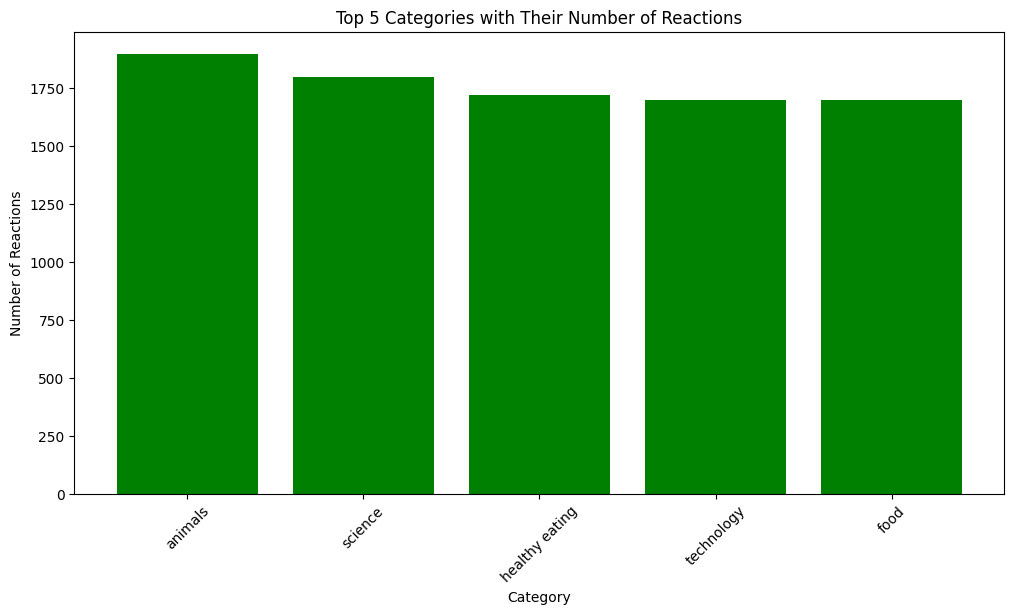

In [5]:
# Plot the top 5 categories with their number of reactions
plt.figure(figsize=(12, 6))
plt.bar(top_5_categories["Category"], top_5_categories["Reaction Count"], color='green')
plt.xlabel('Category')
plt.ylabel('Number of Reactions')
plt.title('Top 5 Categories with Their Number of Reactions')
plt.xticks(rotation=45)
plt.show()

# What was the month with the most posts?

In [6]:
# Convert the 'Datetime' column to datetime format
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract the month and year from the 'Datetime' column
df['Month'] = df['Datetime'].dt.to_period('M')

# Count the number of posts for each month
monthly_post_counts = df['Month'].value_counts().sort_index()

# Find the month with the most posts
most_posts_month = monthly_post_counts.idxmax()
most_posts_count = monthly_post_counts.max()

# Plot the number of posts for each month
plt.figure(figsize=(12, 6))
monthly_post_counts.plot(kind='bar', color='green')
plt.xlabel('Month')
plt.ylabel('Number of Posts')
plt.title('Number of Posts per Month')
plt.xticks(rotation=45)
plt.axhline(y=most_posts_count, color='r', linestyle='--', label=f'Most Posts: {most_posts_month} ({most_posts_count})')
plt.legend()
plt.show()

## Summary

In summary, our analysis highlights the top 5 content categories by reaction count, showcasing the most engaging topics for our audience. Additionally, we identified monthly posting trends, with a clear peak in activity, which can inform our future content planning and engagement strategies. These insights are crucial for optimizing our content to better meet audience preferences and maximize engagement.